In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

In [3]:
data_1=pd.read_csv("2021_1_방한여행(국적별).csv")
data_2=pd.read_csv("2021_2_방한여행(국적별).csv")
data_3=pd.read_csv("2021_3_방한여행(국적별).csv")
data_4=pd.read_csv("2021_4_방한여행(국적별).csv")
data_5=pd.read_csv("2021_5_방한여행(국적별).csv")
data_6=pd.read_csv("2021_6_방한여행(국적별).csv")
data_7=pd.read_csv("2021_7_방한여행(국적별).csv")
data_8=pd.read_csv("2021_8_방한여행(국적별).csv")
data_9=pd.read_csv("2021_9_방한여행(국적별).csv")
data_10=pd.read_csv("2021_10_방한여행(국적별).csv")
data_11=pd.read_csv("2021_11_방한여행(국적별).csv")
data_12=pd.read_csv("2021_12_방한여행(국적별).csv")

In [4]:
data_1

,국적,방한관광객
0,미국,12013
1,필리핀,8087
2,중국,7346
3,미얀마,5249
4,인도네시아,3193


In [5]:
data_1['월']="1월"
data_2['월']="2월"
data_3['월']="3월"
data_4['월']="4월"
data_5['월']="5월"
data_6['월']="6월"
data_7['월']="7월"
data_8['월']="8월"
data_9['월']="9월"
data_10['월']="10월"
data_11['월']="11월"
data_12['월']="12월"

In [6]:
data=pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,],axis=0)
data.reset_index(drop=True,inplace=True)
data.head()

,국적,방한관광객,월
0,미국,12013,1월
1,필리핀,8087,1월
2,중국,7346,1월
3,미얀마,5249,1월
4,인도네시아,3193,1월


<AxesSubplot:xlabel='월', ylabel='방한관광객'>

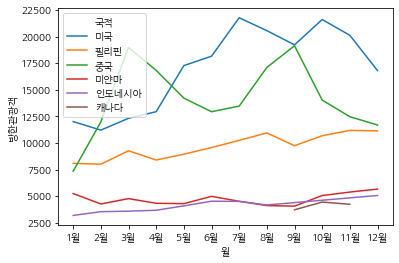

In [7]:
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'

sns.lineplot(x="월", y="방한관광객", hue="국적", data=data)

#시각적으로 확인해봤을 때, 2021년기준 미국이 방한관광객수가 높다고 파악됨

In [ ]:
#시각적으로 확인해봤을 때, 미국의 방한관광객수가 더 높은 것으로 보이지만 중국이 미국보다 2월과 3월은 더 방한여행객 수가 높기 때문에 정확한 판단을 위해 두 집단간의 t-test를 진행함

In [9]:
data_usa=data[data["국적"]=="미국"]
data_ch=data[data["국적"]=="중국"]

C:\Users\김규리\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


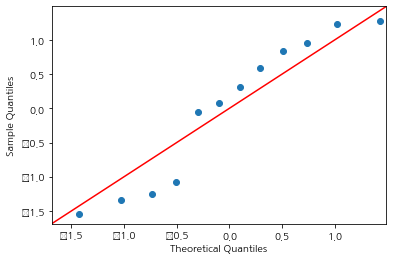

In [11]:
import statsmodels.api as sm
#정규성 검사
#미국 데이터
fig=sm.qqplot(data_usa["방한관광객"], line='45',fit=True)
plt.show()
#qq-plot을 그려보았을 때, 직선을 기준으로 데이터가 어느정도 모여있으므로 정규성을 띈다고 볼 수 있다

In [12]:
from scipy.stats import shapiro
shapiro(data_usa["방한관광객"])
#정규성 있음

ShapiroResult(statistic=0.8916367292404175, pvalue=0.12370870262384415)

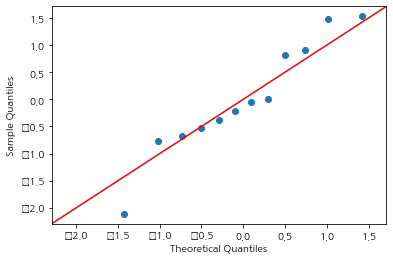

In [13]:
#미국 데이터
fig=sm.qqplot(data_ch["방한관광객"], line='45',fit=True)
plt.show()
#qq-plot을 그려보았을 때, 직선을 기준으로 데이터가 어느정도 모여있으므로 정규성을 띈다고 볼 수 있다

In [14]:
shapiro(data_ch["방한관광객"])
#정규성 있음

ShapiroResult(statistic=0.945271372795105, pvalue=0.569201648235321)

17002.083333333332 14184.583333333334 17718.5 13752.0


C:\Anaconda3\envs\statenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\statenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


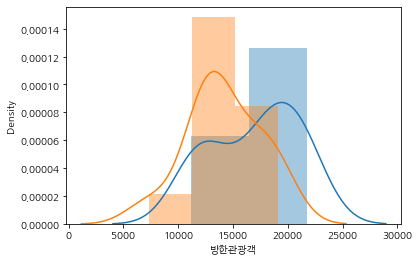

In [15]:
fig,ax=plt.subplots()
sns.distplot(data_usa["방한관광객"],ax=ax)
sns.distplot(data_ch["방한관광객"],ax=ax)
print(np.mean(data_usa["방한관광객"]),np.mean(data_ch["방한관광객"]),np.median(data_usa["방한관광객"]),np.median(data_ch["방한관광객"]))

#distplot을 그려보고 두 집단의 평균과 중앙값을 확인해보았을 때, 두 집단의 분포가 비슷한 것을 확인할 수 있다

In [16]:
stats.bartlett(data_usa["방한관광객"],data_ch["방한관광객"])
#등분산성 만족

BartlettResult(statistic=0.23190766245478323, pvalue=0.6301129191443275)

In [17]:
stats.levene(data_usa["방한관광객"],data_ch["방한관광객"])
#등분산성 만족

LeveneResult(statistic=0.6513315987210098, pvalue=0.4282764367612045)

In [18]:
#qqplot을 그렸을 때 두집단 모두 정규성을 가지는 것으로 보였는데 shapiro 검정을 해보니 모두 p-value가 0.05보다 높게 나왔다
#distplot을 그려보고 bartlett과 levene로 검정해본 결과 둘다 모두 p값은 0.05보다 높게 나왔지만 두집단 모두 정규성을 가지고 있기 때문에 bartlett의 p-value를 고려한다
#따라서 정규성과 등분산성을 가지므로 two way t test를 해준다

In [20]:
from scipy.stats import ttest_ind
ttest_ind(data_usa["방한관광객"],data_ch["방한관광객"])
#데이터 간의 유의미한 차이가 없다는 것을 알 수 있음
#미국과 중국간의 방한여행객의 유의미한 차이가 없다
#따라서 5월을 기준으로 방한여행객수가 더 높았던 미국을 기준으로 2021년 방한 목적에 대해 분석해봄

Ttest_indResult(statistic=1.8829424523288663, pvalue=0.0729984934591116)